In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [24]:
n_visible =784
n_hidden = 50
hidden_bias = np.random.randn(n_hidden)
visible_bias = np.random.randn(n_visible)
v0_state = np.zeros(n_visible, np.float32)
W = np.zeros((n_visible, n_hidden), np.float32)



In [37]:
#temp
a = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
b = np.array([[1], [2], [3]])
c = np.dot(a, b)
c = a @ b
print(type(c))
print(c)


<class 'numpy.ndarray'>
[[14]
 [38]
 [56]]


In [49]:
def sigmoid(X):
    return 1 / (1 + np.exp(X))
def relu(X):
    return np.maximum(X, 0)

In [55]:
#computing the hidden nodes probability vector
h0_prob = sigmoid(([v0_state] @ W) + hidden_bias); 
print(h0_prob.shape)
print(type(h0_prob))
print("first 15 hidden probs: ", h0_prob[0][:5])

#return only the generated hidden states
def hidden_layer(v0_state, W, hb):
    h0_prob = sigmoid(([v0_state] @ W) + hb)
    h0_state = relu(np.sign(h0_prob - np.random.uniform(low=0.0, high=1.0, size=h0_prob.shape)))
    return h0_state
h0_state  = hidden_layer(v0_state, W, hidden_bias)

print(f'first 15 hidden states:{h0_state[0][:5]}')
print(h0_state.shape)
    

(1, 50)
<class 'numpy.ndarray'>
first 15 hidden probs:  [0.86719621 0.80286895 0.27979038 0.4629395  0.34675156]
first 15 hidden states:[1. 1. 0. 1. 1.]
(1, 50)


In [72]:
class BoltzmannMachine:
    def __init__(self, n_visible, n_hidden): 
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.weights = np.random.randn(n_visible, n_hidden)
        self.visible_bias = np.random.randn(n_visible)
        self.hidden_bias = np.random.randn(n_hidden)
        return 
    def sigmoid(self, x):
        return np.exp(np.minimum(x, 0)) / (1 + np.exp(-np.abs(x)))

    def gibbs_sampling(self, visible_data, num_iterations = 1000): 
        samples = np.zeros((num_iterations, self.n_visible))
        visible_state = visible_data
        for t in range(num_iterations): 
            hidden_probs = self.sigmoid(np.dot(visible_state, self.weights) + self.hidden_bias)
            hidden_state = np.random.binomial(1, hidden_probs)
            visible_probs = self.sigmoid(np.dot(hidden_state, self.weights.T)  + self.visible_bias)
            visible_state = np.random.binomial(1, visible_probs) 
            samples[t] = visible_state
        return samples 
    def train(self, data, learning_rate=0.1, num_epochs=1000):
        for epoch in range(num_epochs):
            data_batch = data[np.random.randint(data.shape[0])]
            data_batch = data_batch.reshape(1,-1)
            positive_hidden_probs = self.sigmoid(np.dot(data_batch, self.weights) + self.hidden_bias)
            # print(self.weights.shape)
            # print(positive_hidden_probs.shape)
            # print(data_batch.shape)
            positive_hidden_state = np.random.binomial(1, positive_hidden_probs)
            positive_associations = np.dot(data_batch.T, positive_hidden_probs)

            negative_visible_probs = self.sigmoid(np.dot(positive_hidden_state, self.weights.T) + self.visible_bias)
            negative_visible_state = np.random.binomial(1, negative_visible_probs)
            negative_hidden_probs = self.sigmoid(np.dot(negative_visible_state, self.weights) + self.hidden_bias)
            negative_associations = np.dot(negative_visible_state.T, negative_hidden_probs)

            self.weights += learning_rate * (positive_associations - negative_associations)
            self.visible_bias += learning_rate * np.mean(data_batch - negative_visible_state, axis=0)
            self.hidden_bias += learning_rate * np.mean(positive_hidden_state - negative_hidden_probs, axis=0)

        
        

In [15]:
visible = 4
hidden = 3
data = np.array([[0, 1, 1, 0],
                 [1, 0, 1, 0], 
                 [0, 1, 0, 0],
                 [0, 0, 1, 1]])

In [16]:
bm = BoltzmannMachine(visible, hidden)
bm.train(data)


In [17]:
print(data[0])

[0 1 1 0]


In [57]:
generated_samples = bm.gibbs_sampling(data[0], num_iterations=100)
print("Generated Samples:")
print(generated_samples)

In [24]:
import tensorflow as tf
from keras.datasets import mnist

In [27]:
(train_X, train_y), (test_X, test_y)= mnist.load_data()

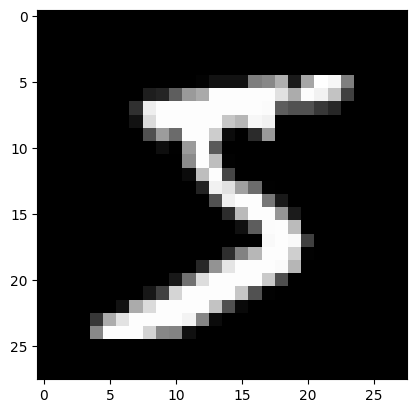

In [39]:
a = train_X[0]
plt.imshow(a, cmap = "gray")

In [61]:

train_X_flattened = train_X.reshape(train_X.shape[0], -1)
print(train_X_flattened.shape)
y = train_X_flattened[:200]
print(y.shape)

(60000, 784)
(200, 784)


In [92]:
newrbm = BoltzmannMachine(28 * 28, 100)
newrbm.train(train_X_flattened[:200])

In [105]:
v = newrbm.gibbs_sampling(train_X_flattened[4])

In [106]:
print(v.shape)

(1000, 784)


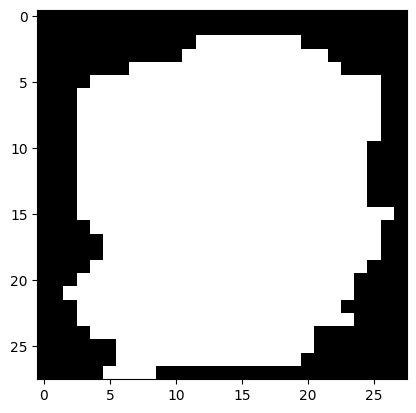

In [107]:
plt.imshow(v[0].reshape(28, 28), cmap = "gray")